# Working with DataFrame Part2

## Outliers Exercise

1. Import pandas and numpy 

In [1]:
# Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

We create a data frame

In [64]:
# First we'll seed the numpy generator
np.random.seed(1234)

#Next we'll create the dataframe
df = DataFrame(np.random.randn(1000,4))

In [67]:
df.columns = ['A', 'B', 'C','D']

In [68]:
#Show the df
df.head()

,A,B,C,D
0,0.471435,-1.190976,1.432707,-0.312652
1,-0.720589,0.887163,0.859588,-0.636524
2,0.015696,-2.242685,1.150036,0.991946
3,0.953324,-2.021255,-0.334077,0.002118
4,0.405453,0.289092,1.321158,-1.546906


### Data description

In [69]:
# Lets describe the data
df.describe()

,A,B,C,D
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.013461,-0.019438,-0.008173,0.097832
std,0.986772,1.015322,0.954209,0.978583
min,-3.434819,-3.563517,-3.880898,-2.597720
25%,-0.641560,-0.703204,-0.626422,-0.572872
50%,0.034928,-0.013105,-0.022875,0.062512
75%,0.680404,0.643578,0.622222,0.783355
max,2.651999,3.220568,2.679854,3.125635


### Plot column B

The boxplot

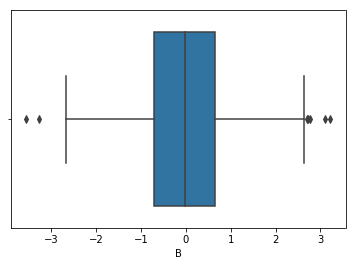

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(x=df['B'])
plt.show()

In [78]:
from scipy.stats import scoreatpercentile
percentile = 95
print (scoreatpercentile(df['B'], percentile))

1.6177585337876381


In [72]:
df['B'].quantile(0.01)

-2.3034049666838587

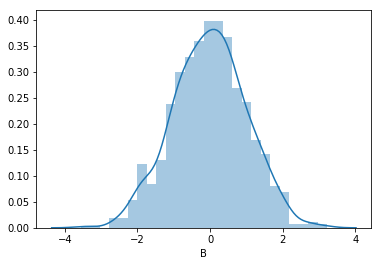

In [73]:
sns.distplot(df['B'])
plt.show()

**Note:** We can see that in column 0 the max and min absolute values are around 3 

In [74]:
# Lets select the first column (it will be a series)
col = df['B']

We can check which values in the column are greater than 3, for instance.

In [75]:
# check the values
col[np.abs(col)>3]

20    -3.563517
333    3.109635
513   -3.277304
572    3.220568
Name: B, dtype: float64

So we now know that in column[0], rows 235 and 910 have values with abs > 3

### How about all the columns?

We can use the **any** method. It returns whether any element is True, potentially over an axis. Axis 0 by default.

In [59]:
# We can use the "any" method
filtered_df = df[(np.abs(df)>3).any(1)]
filtered_df

,0,1,2,3
20,0.464392,-3.563517,1.321106,0.152631
326,0.175091,-1.241138,0.614358,3.125635
333,-0.368085,3.109635,-0.623207,0.977718
417,-0.064638,-1.204956,-3.880898,0.974470
513,1.148495,-3.277304,-1.363946,1.564687
572,-0.711204,3.220568,-0.120112,0.342958
784,-3.233505,0.200243,-0.139337,-0.037094
981,-3.434819,-0.070283,-0.278044,-0.458230


### Remove outliers

First we isolate the index of rows where we found the outlires 

In [60]:
# grab the index
rows = filtered_df.index
len(rows)

8

Second we drop the drows

In [61]:
# drop the rows
df.drop(rows, inplace=True)

In [62]:
# check on the df
df.shape

(992, 4)

In [11]:
## Exercises!